<a href="https://colab.research.google.com/github/xuexi21/HSLU_CTA/blob/main/Copy_of_CTA_GROUP_WORK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stage 1

Pipeline\
**Stage 1: Data cleaning, preprocessing, and exploratory data analysis including topic modelling.**\
In this step, students get a first overview of the dataset and learn to prepare it for the subsequent NLP analyses. This could involve the following tasks:

● Data Collection and Cleaning
- Acquire a comprehensive dataset of cleantech texts.
- Perform data cleaning to remove irrelevant information, special characters, and duplicates.

● Text Preprocessing
- Tokenize the text data into words or phrases.
- Apply stemming or lemmatization to reduce words to their root form.
- Remove stop words and non-informative terms.
- Convert text to lowercase for consistency.

● Exploratory Data Analysis (EDA)
- Compute basic statistics such as word counts, document lengths, and term frequencies.
- Create word clouds to visualize the most frequent terms.
- Plot histograms or bar charts to analyze the distribution of major cleantech topics and categories.
- Identify outliers or anomalies in the data.
- Visualize the distribution of texts with scatter plots or other suitable visualization techniques.

● Topic Modeling
Test topic modeling techniques such as
- LDA and NMF (https://github.com/AnushaMeka/NLP-Topic-Modeling-LDA-NMF),
- Top2Vec (https://github.com/ddangelov/Top2Vec) and
- BERTopic (https://github.com/MaartenGr/BERTopic).

- Visualize and interpret the discovered topics using techniques like word clouds or topic proportion distribution plots.

- Evaluate the quality of the topics.

- Refine the topic model based on evaluation results and domain expertise.

Outputs:

- Notebook with data cleaning and preprocessing steps.
- EDA notebook with visualizations on e.g., hidden topics.



## Set up

In [ ]:
# Mount Google drive

from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
# import the packages.
import pandas as pd
from pathlib import Path
import string
import re
import nltk
import spacy
from textblob import TextBlob



● Data Collection and Cleaning
- Acquire a comprehensive dataset of cleantech texts.
- Perform data cleaning to remove irrelevant information, special characters, and duplicates.


In [ ]:
# Load dataset
data_folder = Path("/content/drive/MyDrive/HSLU/CTA/")
cleantech = data_folder / "cleantech_media_dataset_v1_20231109.csv"
# Inspect the data frame
df = pd.read_csv(cleantech)
df.head()

Unnamed: 0                                              title        date  \
0        1280  Qatar to Slash Emissions as LNG Expansion Adva...  2021-01-13   
1        1281               India Launches Its First 700 MW PHWR  2021-01-15   
2        1283              New Chapter for US-China Energy Trade  2021-01-20   
3        1284  Japan: Slow Restarts Cast Doubt on 2030 Energy...  2021-01-22   
4        1285     NYC Pension Funds to Divest Fossil Fuel Shares  2021-01-25   

  author                                            content       domain  \
0    NaN  ["Qatar Petroleum ( QP) is targeting aggressiv...  energyintel   
1    NaN  ["• Nuclear Power Corp. of India Ltd. ( NPCIL)...  energyintel   
2    NaN  ["New US President Joe Biden took office this ...  energyintel   
3    NaN  ["The slow pace of Japanese reactor restarts c...  energyintel   
4    NaN  ["Two of New York City's largest pension funds...  energyintel   

                                                 url  
0  https://www.energyintel.com/0000017b-a7dc-de4c...  
1  https://www.energyintel.com/0000017b-a7dc-de4c...  
2  https://www.energyintel.com/0000017b-a7dc-de4c...  
3  https://www.energyintel.com/0000017b-a7dc-de4c...  
4  https://www.energyintel.com/0000017b-a7dc-de4c...

In [ ]:
# Inspect the dimensionality of your DataFrame. The shape attribute of pandas.DataFrame stores the number of rows and columns as a tuple (number of rows, number of columns).
df.shape

(9607, 7)

In [ ]:
# Remove unused coloumns
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
# Print information about your DataFrame. You can inspect the total memory usage, the data type of each column, and the number of non-NaN elements.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9607 entries, 0 to 9606
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    9607 non-null   object
 1   date     9607 non-null   object
 2   author   31 non-null     object
 3   content  9607 non-null   object
 4   domain   9607 non-null   object
 5   url      9607 non-null   object
dtypes: object(6)
memory usage: 450.5+ KB


In [ ]:
# the dataset is clean only the author columns have a lot of missing. so I deciend to drop it.
df.drop('author', axis=1, inplace=True)

In [ ]:
# transfer to lower cases
df['content'] = df['content'].apply(lambda x: x.lower())

In [ ]:
# removing punctuations
df['content'] = df['content'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
# df.head()

In [ ]:
# removing html tags
df['content'] = df['content'].apply(lambda x: re.sub('<[^<]+?>', '', x))

In [ ]:
## Newlines, spaces and tabs removal
df['content'] = df['content'].apply(lambda x: re.sub('\s+', ' ', x))


In [ ]:
# Replacing Accented Characters
!pip install unidecode
import unidecode
df['content'] = df['content'].apply(lambda x: unidecode.unidecode(x))


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 3.0 MB/s eta 0:00:00


In [ ]:
# Remove special characters
df['content'] = df['content'].replace(to_replace=r'[^a-zA-Z0-9 ]', value='', regex=True)
# df.head()


In [ ]:
# Remove duplicates
df.drop_duplicates(subset='content', keep='first', inplace=True)


In [ ]:
# !pip install autocorrect

In [ ]:

#=============================
# from spellchecker import SpellChecker

# spell = SpellChecker()

# def correct_spelling(text):
#     corrected_text = list()
#     misspelled_words = spell.unknown(text.split())
#     for word in text.split():
#         next_word = word
#         if word in misspelled_words:
#             next_word = spell.correction(word)
#         corrected_text.append(next_word)

#     return " ".join(corrected_text)

#-------------------------------------
# using autocorrect but take too long time. so ignore the spelling for now.
#-------------------------------------
# from autocorrect import Speller

# speller = Speller(lang='en')
# df['content'] = df['content'].apply(lambda x: speller(x))





In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9602 entries, 0 to 9606
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    9602 non-null   object
 1   date     9602 non-null   object
 2   content  9602 non-null   object
 3   domain   9602 non-null   object
 4   url      9602 non-null   object
dtypes: object(5)
memory usage: 450.1+ KB



● Text Preprocessing
- Tokenize the text data into words or phrases.
- Apply stemming or lemmatization to reduce words to their root form.
- Remove stop words and non-informative terms.
- Convert text to lowercase for consistency.


In [ ]:
# df.head()

In [ ]:
# Tokenize Words
from nltk.tokenize import word_tokenize
nltk.download('punkt')

df['tokens'] = df['content'].apply(lambda x: word_tokenize(x))



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:

# Add 'content lenght'
df['content lenght'] = df['content'].astype(str).apply(len)

# Add simple token count
df['Num Tokens'] = df['content'].apply(lambda x: len(str(x).split()))

# Add polarity
df['Polarity'] = df['content'].map(lambda text: TextBlob(str(text)).sentiment.polarity)

In [ ]:
df.head()

title        date  \
0  Qatar to Slash Emissions as LNG Expansion Adva...  2021-01-13   
1               India Launches Its First 700 MW PHWR  2021-01-15   
2              New Chapter for US-China Energy Trade  2021-01-20   
3  Japan: Slow Restarts Cast Doubt on 2030 Energy...  2021-01-22   
4     NYC Pension Funds to Divest Fossil Fuel Shares  2021-01-25   

                                             content       domain  \
0  qatar petroleum qp is targeting aggressive cut...  energyintel   
1   nuclear power corp of india ltd npcil synchro...  energyintel   
2  new us president joe biden took office this we...  energyintel   
3  the slow pace of japanese reactor restarts con...  energyintel   
4  two of new york citys largest pension funds sa...  energyintel   

                                                 url  \
0  https://www.energyintel.com/0000017b-a7dc-de4c...   
1  https://www.energyintel.com/0000017b-a7dc-de4c...   
2  https://www.energyintel.com/0000017b-a7dc-de4c...   
3  https://www.energyintel.com/0000017b-a7dc-de4c...   
4  https://www.energyintel.com/0000017b-a7dc-de4c...   

                                              tokens  content lenght  \
0  [qatar, petroleum, qp, is, targeting, aggressi...            2611   
1  [nuclear, power, corp, of, india, ltd, npcil, ...            3271   
2  [new, us, president, joe, biden, took, office,...            4192   
3  [the, slow, pace, of, japanese, reactor, resta...            4273   
4  [two, of, new, york, citys, largest, pension, ...            2426   

   Num Tokens  Polarity  
0         442  0.067613  
1         538  0.087188  
2         706 -0.032344  
3         687  0.013495  
4         394  0.012512

## Stopwords Removal. using - Gensim

In [ ]:
from gensim.parsing.preprocessing import STOPWORDS
df['filtered_gensim'] = df['tokens'].apply(lambda x: [word for word in x if word.lower() not in STOPWORDS])
df.head(1)

title        date  \
0  Qatar to Slash Emissions as LNG Expansion Adva...  2021-01-13   

                                             content       domain  \
0  qatar petroleum qp is targeting aggressive cut...  energyintel   

                                                 url  \
0  https://www.energyintel.com/0000017b-a7dc-de4c...   

                                              tokens  content lenght  \
0  [qatar, petroleum, qp, is, targeting, aggressi...            2611   

   Num Tokens  Polarity                                    filtered_gensim  
0         442  0.067613  [qatar, petroleum, qp, targeting, aggressive, ...

## Lemmatization <a name="lemma"></a>

For lemmatization we'll ignore punctuations. Tokenization step using `re` gives us exactly that.

In [ ]:
lemma_step1 = df['filtered_gensim'].apply(lambda x: " ".join([word for word in x]))

In [ ]:
nlp = spacy.load("en_core_web_sm")
df['spacy_lemmas'] = lemma_step1.apply(lambda x: [word.lemma_ for word in nlp(x)])

In [ ]:
df.head(1)

title        date  \
0  Qatar to Slash Emissions as LNG Expansion Adva...  2021-01-13   

                                             content       domain  \
0  qatar petroleum qp is targeting aggressive cut...  energyintel   

                                                 url  \
0  https://www.energyintel.com/0000017b-a7dc-de4c...   

                                              tokens  content lenght  \
0  [qatar, petroleum, qp, is, targeting, aggressi...            2611   

   Num Tokens  Polarity                                    filtered_gensim  \
0         442  0.067613  [qatar, petroleum, qp, targeting, aggressive, ...   

                                        spacy_lemmas  
0  [qatar, petroleum, qp, target, aggressive, cut...

## Stemming with `nltk`
### Using `PorterStemmer()`


In [ ]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()
df['stem'] = df['spacy_lemmas'].apply(lambda x: [ps.stem(w) for w in x])

In [ ]:
df.head(1)

title        date  \
0  Qatar to Slash Emissions as LNG Expansion Adva...  2021-01-13   

                                             content       domain  \
0  qatar petroleum qp is targeting aggressive cut...  energyintel   

                                                 url  \
0  https://www.energyintel.com/0000017b-a7dc-de4c...   

                                              tokens  content lenght  \
0  [qatar, petroleum, qp, is, targeting, aggressi...            2611   

   Num Tokens  Polarity                                    filtered_gensim  \
0         442  0.067613  [qatar, petroleum, qp, targeting, aggressive, ...   

                                        spacy_lemmas  \
0  [qatar, petroleum, qp, target, aggressive, cut...   

                                                stem  
0  [qatar, petroleum, qp, target, aggress, cut, g...


● Exploratory Data Analysis (EDA)
- Compute basic statistics such as word counts, document lengths, and term frequencies.
- Create word clouds to visualize the most frequent terms.
- Plot histograms or bar charts to analyze the distribution of major cleantech topics and categories.
- Identify outliers or anomalies in the data.
- Visualize the distribution of texts with scatter plots or other suitable visualization techniques.





In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9602 entries, 0 to 9606
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            9602 non-null   object 
 1   date             9602 non-null   object 
 2   content          9602 non-null   object 
 3   domain           9602 non-null   object 
 4   url              9602 non-null   object 
 5   tokens           9602 non-null   object 
 6   content lenght   9602 non-null   int64  
 7   Num Tokens       9602 non-null   int64  
 8   Polarity         9602 non-null   float64
 9   filtered_gensim  9602 non-null   object 
 10  spacy_lemmas     9602 non-null   object 
 11  stem             9602 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 975.2+ KB


In [ ]:
df.to_csv(data_folder / "out.csv")

In [ ]:


# Mount Google drive

from google.colab import drive
drive.mount('/content/drive')

# import the packages.
import pandas as pd
from pathlib import Path
import string
import re
import nltk
import spacy
from textblob import TextBlob


data_folder = Path("/content/drive/MyDrive/HSLU/CTA/")
cleantech = data_folder / "out.csv"
# Inspect the data frame
df = pd.read_csv(cleantech)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Text(0.5, 1.0, 'Polarity distribution')

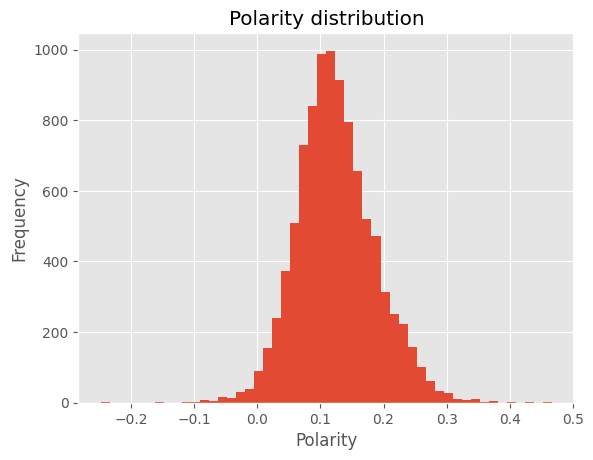

In [ ]:
# Plot the distribution of polarity sentiment score
# change plotting colors per client request
import matplotlib.pyplot as plt


plt.style.use('ggplot')
df['Polarity'].plot(kind='hist', bins=50)
plt.xlabel('Polarity')
plt.title('Polarity distribution')

In [ ]:
# Remove unused coloumns
df.drop('Unnamed: 0', axis=1, inplace=True)
# df.drop('content', axis=1, inplace=True)
df.drop('tokens', axis=1, inplace=True)
df.drop('filtered_gensim', axis=1, inplace=True)
df.drop('spacy_lemmas', axis=1, inplace=True)
df.drop('url', axis=1, inplace=True)

# Descriptive statistics of your dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9602 entries, 0 to 9601
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           9602 non-null   object 
 1   date            9602 non-null   object 
 2   content         9602 non-null   object 
 3   domain          9602 non-null   object 
 4   content lenght  9602 non-null   int64  
 5   Num Tokens      9602 non-null   int64  
 6   Polarity        9602 non-null   float64
 7   stem            9602 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 600.2+ KB


In [ ]:
# Descriptive statistics of your dataframe
df.describe()

content lenght   Num Tokens     Polarity
count     9602.000000  9602.000000  9602.000000
mean      4702.862841   762.422933     0.124844
std       2722.673651   448.852137     0.061622
min       1120.000000   193.000000    -0.247789
25%       2640.000000   425.000000     0.084188
50%       4050.500000   648.000000     0.120324
75%       6025.250000   981.000000     0.161638
max      18815.000000  2985.000000     0.466667

In [ ]:
# Take a look at our new features
df.iloc[0][['stem', 'content lenght', 'Num Tokens']]

stem              ['qatar', 'petroleum', 'qp', 'target', 'aggres...
content lenght                                                 2611
Num Tokens                                                      442
Name: 0, dtype: object

## Exploratory Text Analysis (ETA)

Some of the text features' analysis were recently implemented in pandas profiling. However, a lot of them are still missing. Let's take a look at how to build them ourselves.


### word clouds

In [ ]:
# Let's start with some visuals
!pip install WordCloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# Set preferences
sns.set(color_codes=True)

In [ ]:
# Get all review texts
all_tockens = df['stem']
all_tockens[-1:]

9601    ['arevon', 'energi', 'close', 'financ', 'vike'...
Name: stem, dtype: object

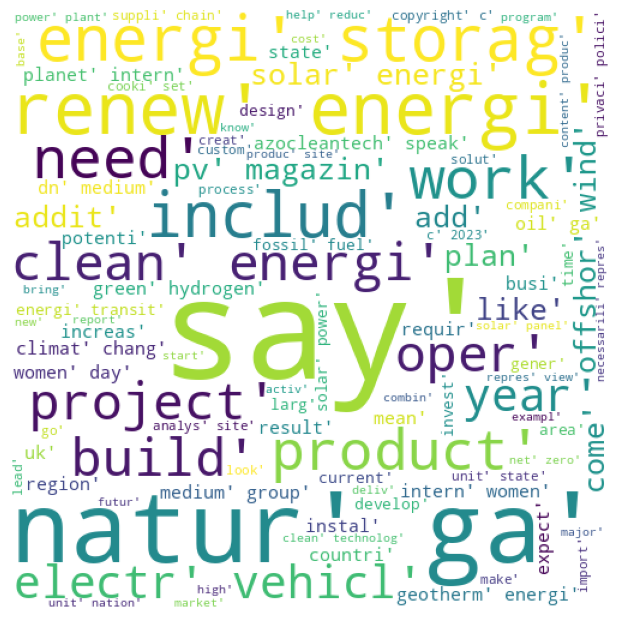

In [ ]:
# Now let's generate a wordcloud for some reviews
wordcloud = WordCloud(width = 500, height = 500,
                background_color ='white',
                min_font_size = 10).generate(all_tockens.str.cat())

# plot the WordCloud image
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

### Unigrams

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df['content'], 20)

unigrams_w_stops = pd.DataFrame(common_words, columns = ['word' , 'count'])
unigrams_w_stops

word   count
0      the  411980
1       to  221759
2      and  216565
3       of  203922
4       in  150226
5      for   92385
6       is   86513
7     that   64474
8   energy   62495
9     with   54866
10      on   53559
11    this   51981
12      as   43401
13      by   43299
14      be   42645
15     are   40590
16    from   39304
17      it   37205
18    will   36256
19   solar   33505

Text(0.5, 1.0, 'Unigrams with stopwords')

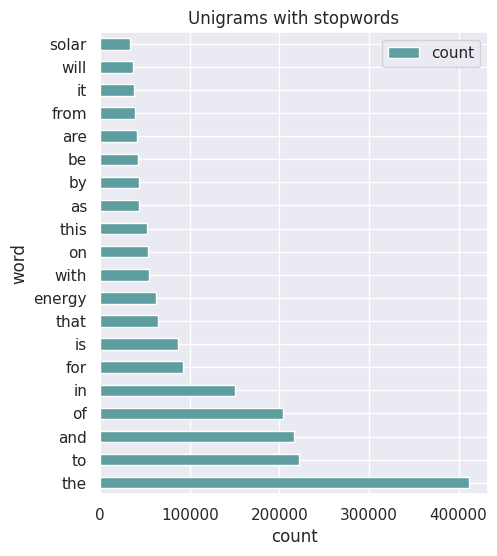

In [ ]:
unigrams_w_stops.plot(kind='barh', x='word', color='cadetblue', width=0.5, figsize=(5,6))
plt.xlabel('count')
plt.ylabel('word')
plt.title('Unigrams with stopwords')

In [ ]:
# Unigrams after stopword removal
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['content'], 20)
unigrams = pd.DataFrame(common_words, columns = ['word' , 'count'])
unigrams

word  count
0        energy  62495
1         solar  33505
2           new  21050
3         power  20294
4           gas  19175
5          said  16972
6          data  14186
7       project  14053
8       storage  13706
9    geothermal  12752
10     hydrogen  12562
11   technology  12423
12         wind  12152
13  development  11616
14      company  11593
15    renewable  10991
16         year  10935
17     industry  10814
18     projects  10432
19         site  10012

Text(0.5, 1.0, 'Unigrams w/o stopwords')

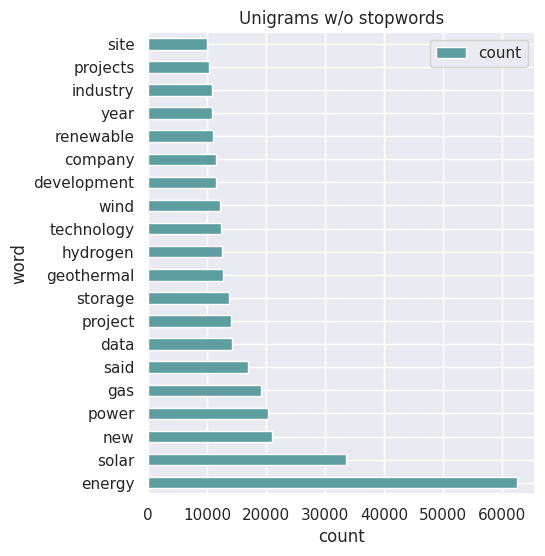

In [ ]:
unigrams.plot(kind='barh', x='word', color='cadetblue', width=0.5, figsize=(5,6))
plt.xlabel('count')
plt.ylabel('word')
plt.title('Unigrams w/o stopwords')

### scatter matrix


<Axes: xlabel='content lenght', ylabel='Polarity'>

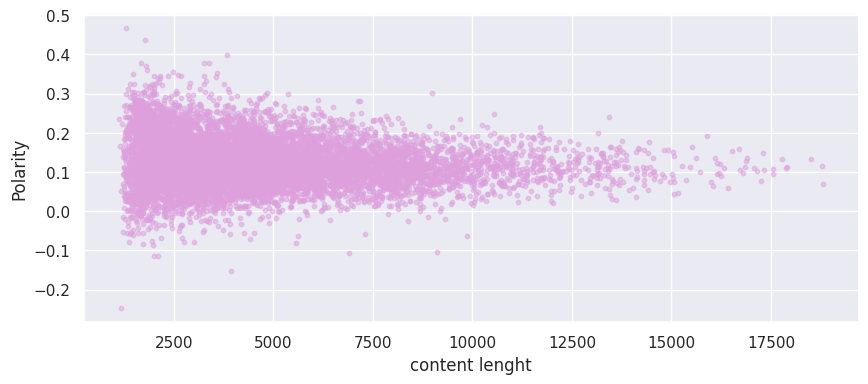

In [ ]:
#Scatter plots are very good at showing the **interaction between two numeric variables** (especially when they're continuous)!
df.plot(kind='scatter', x='content lenght', y='Polarity', \
        color='plum', figsize=(10,4), s=10, alpha=0.5)

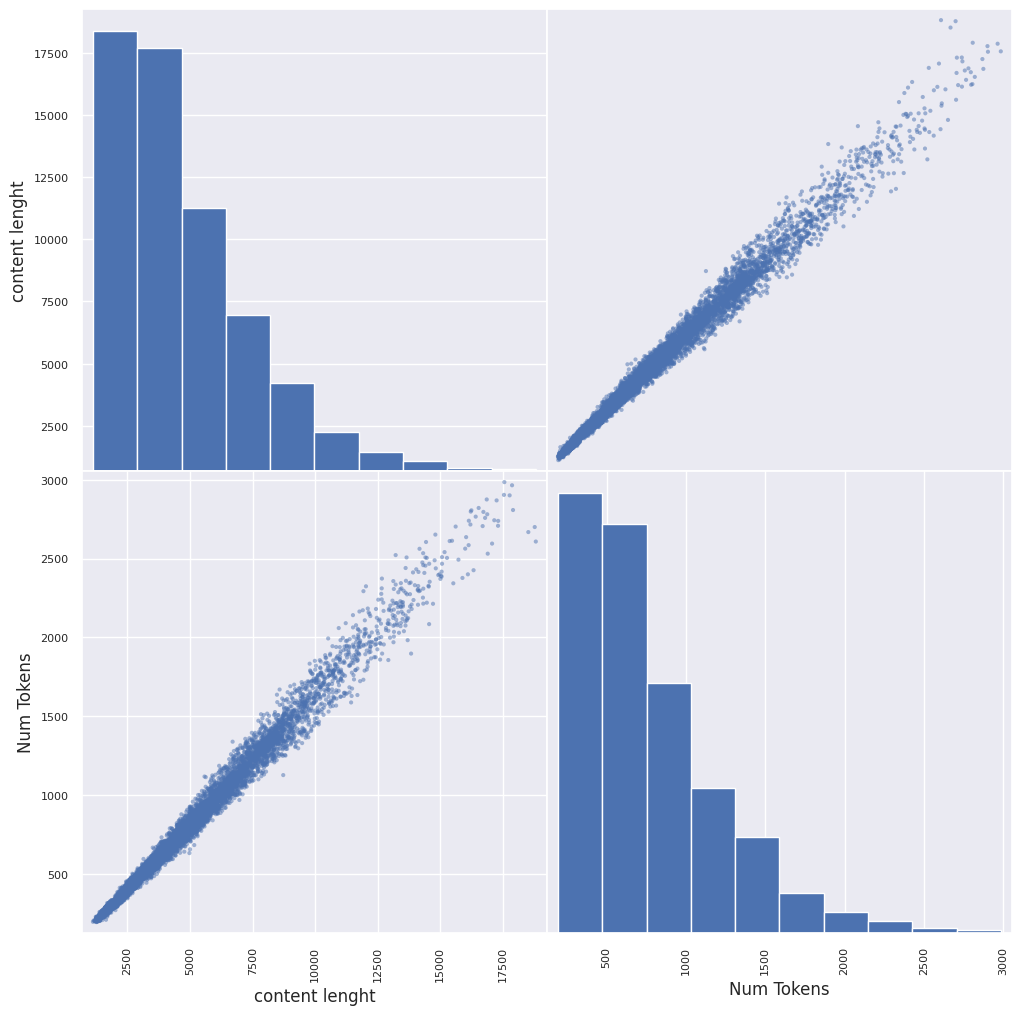

In [ ]:
pd.plotting.scatter_matrix(
    df.select_dtypes(include=['number','float']).iloc[:,-8:-1],
    figsize=(12,12)
);

## Topic Modeling
Test topic modeling techniques such as
- LDA and NMF (https://github.com/AnushaMeka/NLP-Topic-Modeling-LDA-NMF),
- Top2Vec (https://github.com/ddangelov/Top2Vec) and
- BERTopic (https://github.com/MaartenGr/BERTopic).

- Visualize and interpret the discovered topics using techniques like word clouds or topic proportion distribution plots.

- Evaluate the quality of the topics.

- Refine the topic model based on evaluation results and domain expertise.

Outputs:

- Notebook with data cleaning and preprocessing steps.
- EDA notebook with visualizations on e.g., hidden topics.


In [ ]:
# TF-IDF VECTORIZATION
from sklearn.feature_extraction import _stop_words as sklearn_stop_words
# Grab standard English stopwords
stop_words = set(sklearn_stop_words.ENGLISH_STOP_WORDS)
# And add in some of our own ("like" is really common and doesn't tell us much)
stop_words = stop_words.union(set([
    "www", "http", "https", "br", "amazon", "href", "wa", "ha",
    "like", "just",
]))

In [ ]:
# victorization

# https://www.egochi.com/tfidfvectorizer/#:~:text=It%20is%20calculated%20using%20the,words%20in%20this%20particular%20document.
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

tfidf_vectorizer = TfidfVectorizer(
    max_df=0.9, # Remove any words that appear in more than 90% of our documents
    min_df=5, # Remove words that appear in fewer than 5 document
    ngram_range=(1, 1), # Only extract unigrams
    stop_words=list(stop_words), # Remove stopwords
    max_features=2500 # Grab the 2500 most common words (based on above constraints)
)
tfidf = tfidf_vectorizer.fit_transform(df['content'])
ngrams = tfidf_vectorizer.get_feature_names_out()

In [ ]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [ ]:
# Here's a quick little functiom to loop over a trained topic model and print off the top words for each topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #{}: {}".format(
            topic_idx,
            ", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        ))

In [ ]:
# Let's find some topics.  We'll check out non-negative matrix factorization (NMF) first.
nmf = NMF(n_components=10, random_state=42, l1_ratio=.5).fit(tfidf)
# Try out different numbers of topics (change n_components)
# Documentation: http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html
print("\nTopics in NMF model:")
print_top_words(nmf, ngrams, 10)





Topics in NMF model:
Topic #0: solar, energy, projects, project, industry, power, mw, renewable, community, panels
Topic #1: azocleantech, spoke, plastic, womens, planet, interview, organization, international, day, development
Topic #2: dn, media, recharge, group, read, data, nhst, websites, privacy, responsible
Topic #3: pv, data, website, magazine, cookie, settings, deleted, personal, parties, comment
Topic #4: gas, natural, ngi, lng, daily, said, news, issn, prices, oil
Topic #5: geothermal, energy, heat, heating, drilling, project, development, wells, source, power
Topic #6: tesla, cleantechnica, electric, ev, vehicle, charging, vehicles, sales, car, model
Topic #7: hydrogen, green, fuel, energy, production, ammonia, carbon, gas, blue, h2
Topic #8: wind, offshore, energy, uk, climate, said, oil, carbon, emissions, new
Topic #9: energy, battery, storage, batteries, power, grid, systems, technology, lithiumion, home


In [ ]:
# LDA

lda = LatentDirichletAllocation(n_components=10, random_state=42).fit(tfidf)
# Documentation: http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html
# Two fun parameters to play with, that you can pass to the LDA class above:
# doc_topic_prior (alpha) - lower alpha means documents will be composed of fewer topics (higher means a more uniform distriution across all topics)
# topic_word_prior (beta) - lower beta means topics will be composed of fewer words (higher means a more uniform distribution across all words)
print("\nTopics in LDA model:")
print_top_words(lda, ngrams, 10)



Topics in LDA model:
Topic #0: gas, ngi, natural, lng, daily, news, said, issn, prices, oil
Topic #1: tesla, electric, cleantechnica, ev, charging, vehicle, vehicles, sales, car, zach
Topic #2: geothermal, energy, heat, drilling, heating, project, wells, development, source, kenya
Topic #3: solar, energy, projects, project, industry, mw, storage, power, renewable, probing
Topic #4: fusion, megawatts, mwh, laserbased, twitter, signed, joe, utilityscale, readers, expects
Topic #5: azocleantech, spoke, plastic, womens, planet, interview, organization, international, day, research
Topic #6: solar, battery, inverter, power, home, systems, pv, webinar, storage, homeowners
Topic #7: dn, media, recharge, group, read, data, nhst, websites, privacy, responsible
Topic #8: energy, solar, hydrogen, wind, power, new, said, green, climate, renewable
Topic #9: pv, website, data, magazine, solar, cookie, settings, cookies, deleted, personal


### bertopic


In [ ]:
# from bertopic import BERTopic
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 16.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.8 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039288 sha256=52878c97c3d3aedfe107af8287af263355fbf289805f97cc37c7a2e686665039
  Stored in dir

In [ ]:
from bertopic import BERTopic
# # **Topic Modeling**

# In this example, we will go through the main components of BERTopic and the steps necessary to create a strong topic model.



## Training

# We start by instantiating BERTopic. We set language to `english` since our documents are in the English language. If you would like to use a multi-lingual model, please use `language="multilingual"` instead.

# We will also calculate the topic probabilities. However, this can slow down BERTopic significantly at large amounts of data (>100_000 documents). It is advised to turn this off if you want to speed up the model.
#
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(df['stem'])

2023-12-20 20:20:40,189 - BERTopic - Embedding - Transforming documents to embeddings.


.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

Batches:   0%|          | 0/301 [00:00<?, ?it/s]

2023-12-20 20:55:55,360 - BERTopic - Embedding - Completed ✓
2023-12-20 20:55:55,364 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2023-12-20 20:56:47,578 - BERTopic - Dimensionality - Completed ✓
2023-12-20 20:56:47,581 - BERTopic - Cluster - Start clustering the reduced embeddings
2023-12-20 20:56:52,308 - BERTopic - Cluster - Completed ✓
2023-12-20 20:56:52,323 - BERTopic - Representation - Extracting topics from clusters using representation models.
2023-12-20 20:57:03,275 - BERTopic - Representation - Completed ✓


In [ ]:
## Extracting Topics
# After fitting our model, we can start by looking at the results. Typically, we look at the most frequent topics first as they best represent the collection of documents.

freq = topic_model.get_topic_info(); freq.head(5)

Topic  Count                                   Name  \
0     -1   3726          -1_solar_energi_power_project   
1      0   1669  0_azocleantech_speak_plastic_research   
2      1    654                1_tesla_ev_vehicl_charg   
3      2    535           2_geotherm_heat_energi_drill   
4      3    418                   3_ga_daili_natur_ngi   

                                      Representation  \
0  [solar, energi, power, project, renew, storag,...   
1  [azocleantech, speak, plastic, research, envir...   
2  [tesla, ev, vehicl, charg, car, electr, cleant...   
3  [geotherm, heat, energi, drill, project, devel...   
4  [ga, daili, natur, ngi, lng, news, issn, price...   

                                 Representative_Docs  
0  [['europ', 's', 'solar', 'instal', 'level', 'e...  
1  [['click', 'allow', 'agre', 'store', 'cooki', ...  
2  [['6', 'auto', 'sale', 'ev', '22', 'auto', 'sa...  
3  [['world', 'need', 'energi', 'sourc', 'contrib...  
4  [['sign', 'good', 'natur', 'ga', 'news', 'datu...

In [ ]:
# -1 refers to all outliers and should typically be ignored. Next, let's take a look at a frequent topic that were generated:

topic_model.get_topic(0)  # Select the most frequent topic

[('azocleantech', 0.01927418328973155),
 ('speak', 0.018215257808483876),
 ('plastic', 0.01810466497973441),
 ('research', 0.012713525617090491),
 ('environment', 0.012653351822121574),
 ('planet', 0.012178144554938007),
 ('women', 0.012122265783182908),
 ('inspir', 0.012032467195140305),
 ('organ', 0.011951842082078078),
 ('interview', 0.011755900117005717)]

In [ ]:
# # **Visualization**
# There are several visualization options available in BERTopic, namely the visualization of topics, probabilities and topics over time. Topic modeling is, to a certain extent, quite subjective. Visualizations help understand the topics that were created.

topic_model.visualize_topics()

In [ ]:
## Visualize Topic Probabilities

# The variable `probabilities` that is returned from `transform()` or `fit_transform()` can
# be used to understand how confident BERTopic is that certain topics can be found in a document.

# To visualize the distributions, we simply call:

topic_model.visualize_distribution(probs[200], min_probability=0.00001)

In [ ]:
# ## Visualize Topic Hierarchy

# The topics that were created can be hierarchically reduced. In order to understand the potential hierarchical structure of the topics, we can use scipy.cluster.hierarchy to create clusters and visualize how they relate to one another. This might help selecting an appropriate nr_topics when reducing the number of topics that you have created.
topic_model.visualize_hierarchy(top_n_topics=50)

In [ ]:
# ## Visualize Terms

# We can visualize the selected terms for a few topics by creating bar charts out of the c-TF-IDF scores for each topic representation. Insights can be gained from the relative c-TF-IDF scores between and within topics. Moreover, you can easily compare topic representations to each other.


topic_model.visualize_barchart(top_n_topics=5)

In [ ]:
# ## Visualize Topic Similarity
# Having generated topic embeddings, through both c-TF-IDF and embeddings, we can create a similarity matrix by simply applying cosine similarities through those topic embeddings. The result will be a matrix indicating how similar certain topics are to each other.

topic_model.visualize_heatmap(n_clusters=20, width=1000, height=1000)

In [ ]:
# ## Visualize Term Score Decline
# Topics are represented by a number of words starting with the best representative word. Each word is represented by a c-TF-IDF score. The higher the score, the more representative a word to the topic is. Since the topic words are sorted by their c-TF-IDF score, the scores slowly decline with each word that is added. At some point adding words to the topic representation only marginally increases the total c-TF-IDF score and would not be beneficial for its representation.

# To visualize this effect, we can plot the c-TF-IDF scores for each topic by the term rank of each word. In other words, the position of the words (term rank), where the words with the highest c-TF-IDF score will have a rank of 1, will be put on the x-axis. Whereas the y-axis will be populated by the c-TF-IDF scores. The result is a visualization that shows you the decline of c-TF-IDF score when adding words to the topic representation. It allows you, using the elbow method, the select the best number of words in a topic.



topic_model.visualize_term_rank()

# Stage 2

#### Word Embeddings with Word2vec

In [ ]:
# First we have to convert "stem" column as Python lists
import ast

In [ ]:
# Convert the string representations to actual lists
df['stem'] = df['stem'].apply(ast.literal_eval)

# Convert the "stem" column to a list of lists
word_lists = df['stem'].tolist()

# Display the first few lists
print(word_lists[:5])

[['qatar', 'petroleum', 'qp', 'target', 'aggress', 'cut', 'greenhous', 'ga', 'emiss', 'prepar', 'launch', 'phase', '2', 'plan', '48', 'million', 'ton', 'year', 'lng', 'expans', 'late', 'sustain', 'report', 'publish', 'wednesday', 'qp', 'say', 'goal', 'includ', 'reduc', 'emiss', 'intens', 'qatar', 'lng', 'facil', '25', 'upstream', 'facil', '15', 'compani', 'aim', 'reduc', 'ga', 'flare', 'intens', 'upstream', 'facil', '75', 'rais', 'carbon', 'captur', 'storag', 'ambit', '5', 'million', 'tonsyr', '7', 'million', 'tonsyr', '2027', '22', 'million', 'tonsyr', 'carbon', 'captur', 'goal', 'come', '32', 'million', 'tonyr', 'phase', '1', 'lng', 'expans', 'know', 'north', 'field', 'east', 'project', '11', 'million', 'tonsyr', 'come', 'phase', '2', 'know', 'north', 'field', 'south', 'project', 'rais', 'qatar', 'lng', 'capac', '16', 'million', 'tonsyr', 'qatar', 'current', 'lng', 'product', 'capac', '78', 'million', 'tonsyr', 'eye', 'phase', 'expans', '126', 'million', 'tonsyr', 'qp', 'say', 'abl',

In [ ]:
# Now We train a Word2Vec model
import gensim
# Set values for various parameters
feature_size = 100    # Word vector dimensionality
window_context = 20          # Context window size
min_word_count = 2   # Minimum word count

# Initialize and train the Word2Vec model


w2v_model = gensim.models.Word2Vec(word_lists, vector_size=feature_size, window=window_context, min_count=min_word_count)
# w2v_model = gensim.models.Word2Vec(sentences=df['stem'].tolist(), vector_size=feature_size, window=window_context, min_count=min_word_count).  # kai

# Get vocabulary count of the model
print("Vocabulary size:", len(w2v_model.wv.index_to_key))
print("Vocabulary:", w2v_model.wv.index_to_key)

Vocabulary size: 44349
Vocabulary: ['energi', 's', 'solar', 'project', 'power', 'develop', 'say', 'new', 'ga', 'electr', 'compani', 'year', 'technolog', 'industri', 'renew', 'product', 'market', 'storag', 'provid', 'geotherm', 'datum', 'use', 'hydrogen', 'batteri', 'wind', 'site', 'support', 'gener', 'natur', 'time', 'clean', 'need', 'help', 'research', 'state', 'invest', 'plan', 'carbon', 'includ', 'global', 'oper', 'world', 'work', 'nation', 'emiss', 'pv', 'build', 'climat', 'million', 'cost', 'green', 'set', 'produc', 'vehicl', 'like', 'chang', 'price', 'sustain', 'capac', 'fuel', 'transit', 'suppli', '2023', 'group', 'increas', 'environment', 'futur', 'cooki', 'websit', 'reduc', 'heat', 'continu', 'speak', 'plant', 'polici', 'solut', 'larg', 'unit', 'high', 'instal', 'content', 'manufactur', 'sector', 'day', 'intern', 'azocleantech', 'process', 'manag', 'lead', 'cleantechnica', 'current', 'commun', 'countri', 'plastic', 'recent', 'oil', 'ev', 't', 'report', 'come', 'demand', 'grid'

We play a bit around with our word embeddings, looking for similar words for example, or calculating the similarity between words. For example for 'student', which is contained in our vocabulary, we receive similar words such as 'undergraduate', 'college' or 'phd' etc.

In [ ]:
# Inspect most similar words
w2v_model.wv.most_similar('student', topn=5)

[('undergradu', 0.8376391530036926),
 ('teach', 0.8247408866882324),
 ('colleg', 0.8064364194869995),
 ('career', 0.798425555229187),
 ('phd', 0.7955057621002197)]

We play a bit around with our word embeddings, looking for similar words for example, or calculating the similarity between words. For example for 'solar', which is contained in our vocabulary, we receive similar words such as 'rooftop', 'photovolta' or 'panel' etc.

In [ ]:
# View similar words based on gensim's model
similar_words = {
    search_term:
    [item[0] for item in w2v_model.wv.most_similar([search_term], topn=5)]
    for search_term in ['solar', 'project', 'agreement', 'network', 'report', 'present']
}
similar_words

{'solar': ['photovolta', 'rooftop', 'groundmount', 'articleid1562', 'roof'],
 'project': ['construct', 'largescal', 'cypress', 'greenfield', 'stage'],
 'agreement': ['mou', 'memorandum', 'sign', 'offtak', 'evn'],
 'network': ['dcc', 'connect', 'crossbord', 'newsid30870', 'charger'],
 'report': ['statist', 'analysi', 'find', 'bloombergnef', 'quarterli'],
 'present': ['confer', 'discuss', 'expert', 'eurocorr', 'webinar']}

We then visualize our word embeddings in a 2-dimensional space, using the T-SNE algorithm. It is interesting that we see related words like 'University', 'Study', 'Experience', 'Report' close to each other. There are also many other interesting / related clusters like that 'CEO', 'President', 'Executive', 'Interview'.

In [ ]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt




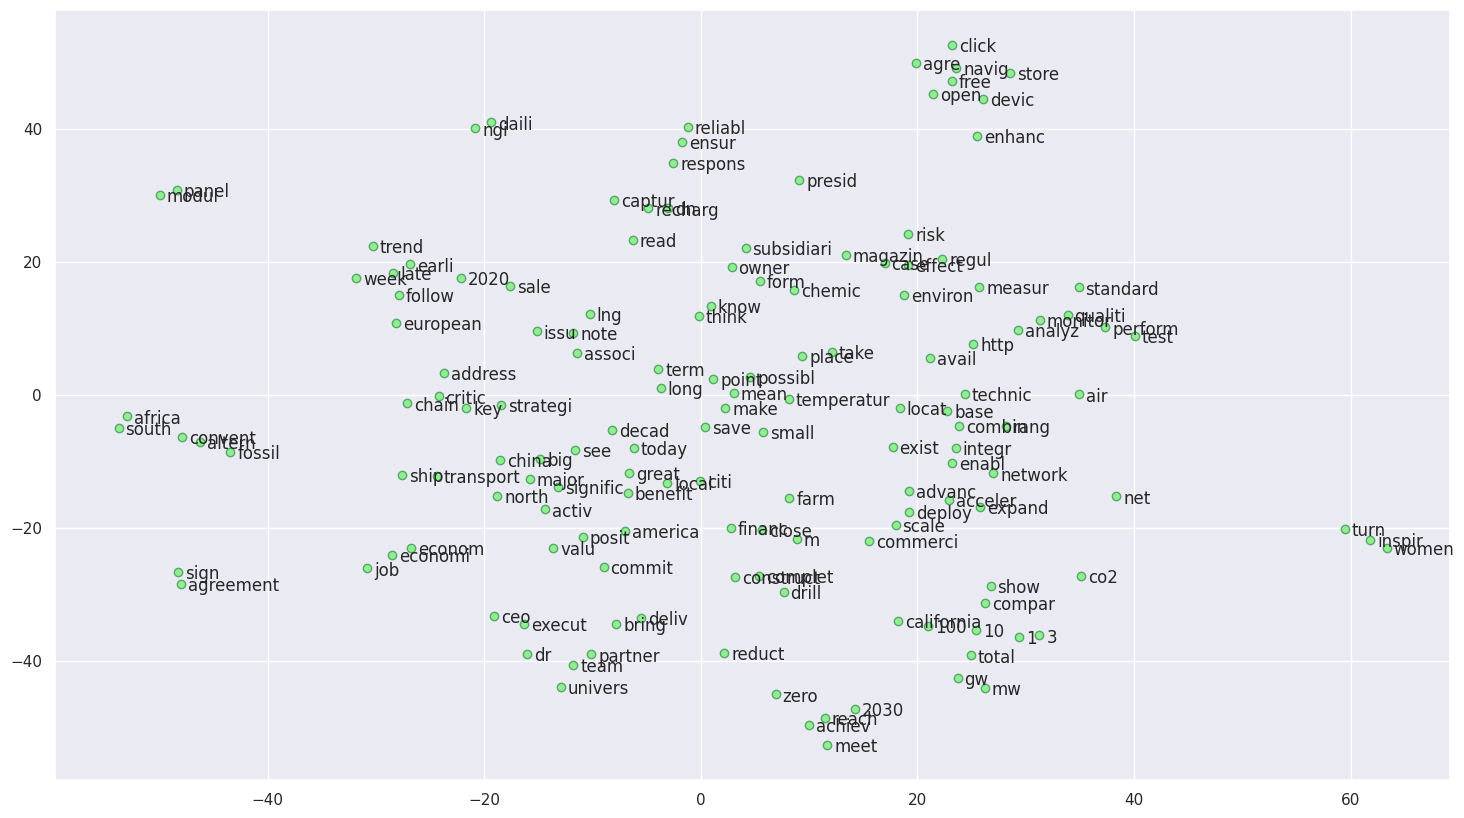

In [ ]:
words = w2v_model.wv.index_to_key[200:350]
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=5)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

fig, ax = plt.subplots(figsize=(18, 10))
ax.scatter(T[:, 0], T[:, 1], c='lightgreen', edgecolors='g')
for i, label in enumerate(labels):
    ax.annotate(label, xy=(T[i, 0], T[i, 1]), xytext=(5, -5), textcoords='offset points')
plt.show()

### Sentence Embedding Autoencoder

In [ ]:
import gensim.downloader as api

glove_vectors = api.load("glove-wiki-gigaword-100")

[==================================================] 100.0% 128.1/128.1MB downloaded


#### Calculate document embeddings

In [ ]:
import numpy as np

# Define function
def calculate_document_embeddings(document, embeddings):
    # Filter out words that don't have embeddings
    words_with_embeddings = [word for word in document if word in embeddings]

    # If no words have embeddings, return None or handle accordingly
    if not words_with_embeddings:
        return None

    # Calculate the average embedding for the document
    document_embedding = np.mean([embeddings[word] for word in words_with_embeddings], axis=0)

    return document_embedding

In [ ]:
# Apply function:
df['embeddings'] = df['stem'].apply(lambda x: calculate_document_embeddings(x, glove_vectors))

In [ ]:
df.head()

title        date  \
0  Qatar to Slash Emissions as LNG Expansion Adva...  2021-01-13   
1               India Launches Its First 700 MW PHWR  2021-01-15   
2              New Chapter for US-China Energy Trade  2021-01-20   
3  Japan: Slow Restarts Cast Doubt on 2030 Energy...  2021-01-22   
4     NYC Pension Funds to Divest Fossil Fuel Shares  2021-01-25   

                                             content       domain  \
0  qatar petroleum qp is targeting aggressive cut...  energyintel   
1   nuclear power corp of india ltd npcil synchro...  energyintel   
2  new us president joe biden took office this we...  energyintel   
3  the slow pace of japanese reactor restarts con...  energyintel   
4  two of new york citys largest pension funds sa...  energyintel   

   content lenght  Num Tokens  Polarity  \
0            2611         442  0.067613   
1            3271         538  0.087188   
2            4192         706 -0.032344   
3            4273         687  0.013495   
4            2426         394  0.012512   

                                                stem  \
0  [qatar, petroleum, qp, target, aggress, cut, g...   
1  [nuclear, power, corp, india, npcil, synchron,...   
2  [new, presid, joe, biden, take, offic, week, u...   
3  [slow, pace, japanes, reactor, restart, contin...   
4  [new, york, citi, larg, pension, fund, divest,...   

                                          embeddings  
0  [0.082134895, 0.33170885, 0.19256979, -0.06753...  
1  [-0.050984614, 0.28866425, 0.16285247, 0.00421...  
2  [0.08823901, 0.2700086, 0.30357844, -0.0506459...  
3  [0.014275476, 0.12384993, 0.22764364, 0.033872...  
4  [0.03051765, 0.2527219, 0.16498739, -0.1078431...

#### Training Sentence Embedding

In [ ]:
#! pip install torch

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split

In [ ]:
# Split the data into training and testing sets

X_train, X_test = train_test_split(
    df['embeddings'].values,
    test_size=0.2,
    random_state=42       # Set the random seed for reproducibility
)

# Flatten the arrays and convert to NumPy arrays
X_train = np.vstack(X_train)
X_test = np.vstack(X_test)

# Convert the data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)


# Define the neural network model
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

input_size = X_train.shape[1]
hidden_size = 128
output_size = input_size

model = SimpleNN(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, X_train)
    loss.backward()
    optimizer.step()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}')

Epoch [1/10], Loss: 0.07013167440891266
Epoch [2/10], Loss: 0.06502801924943924
Epoch [3/10], Loss: 0.0604451522231102
Epoch [4/10], Loss: 0.05624962970614433
Epoch [5/10], Loss: 0.05233226716518402
Epoch [6/10], Loss: 0.04861385375261307
Epoch [7/10], Loss: 0.04503777623176575
Epoch [8/10], Loss: 0.04157250374555588
Epoch [9/10], Loss: 0.038208577781915665
Epoch [10/10], Loss: 0.034953683614730835


In [ ]:
# Set the model to evaluation mode
model.eval()

# Forward pass on the test set
with torch.no_grad():
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, X_test)

print(f'Test Loss: {test_loss.item()}')

Test Loss: 0.03179033845663071


### Model Evaluation

#### Word Embeddings

We're first going to evaluate the word2vec model we trained above. First we will let the word2vec model output the 5 most similar words and calculate the similarity accordingly. Using gensim, we'll then let the model output the most similar words for a list of 5 different words. After this, we're going to do the same with a pretrained model and compare the results.

In [ ]:
# Inspect most similar words, india
w2v_model.wv.most_similar('india', topn=5)

[('indian', 0.6881569623947144),
 ('ladakh', 0.6711819767951965),
 ('poland', 0.6676121950149536),
 ('uae', 0.6391562819480896),
 ('governmentown', 0.6207780241966248)]

In [ ]:
# Inspect most similar words, trade
w2v_model.wv.most_similar('trade', topn=5)

[('fair', 0.5816444158554077),
 ('intercontinent', 0.5294100642204285),
 ('nawracala', 0.5228998064994812),
 ('foreign', 0.5119240283966064),
 ('relaps', 0.5004059672355652)]

In [ ]:
# View similar words based on gensim's model
similar_words = {
    search_term:
    [item[0] for item in w2v_model.wv.most_similar([search_term], topn=5)]
    for search_term in ['solar', 'uae', 'port', 'network', 'report', 'present']
}
similar_words

{'solar': ['photovolta', 'rooftop', 'groundmount', 'articleid1562', 'roof'],
 'uae': ['poland', 'curacao', 'sultan', 'masdar', 'thereserobinson'],
 'port': ['nigg', 'quaysid', 'barg', 'dock', 'quay'],
 'network': ['dcc', 'connect', 'crossbord', 'newsid30870', 'charger'],
 'report': ['statist', 'analysi', 'find', 'bloombergnef', 'quarterli'],
 'present': ['confer', 'discuss', 'expert', 'eurocorr', 'webinar']}

Now let's load the pretrained model and let it do the same tasks:

In [ ]:
import gensim.downloader as api

# Download the pretrained Glove embeddings. Try fasttext at home.
# https://colab.research.google.com/drive/1sv3cFa1XmliVewoFqqxNZrzKZcylCj8k?usp=sharing
glove_vectors = api.load("glove-wiki-gigaword-100")

In [ ]:
# Inspect most similar words, india
glove_vectors.most_similar('india', topn=5)

[('pakistan', 0.8370323777198792),
 ('indian', 0.780203104019165),
 ('delhi', 0.7712194323539734),
 ('bangladesh', 0.7661641240119934),
 ('lanka', 0.7639288306236267)]

In [ ]:
# Inspect most similar words, india
glove_vectors.most_similar('trade', topn=5)

[('export', 0.7138485312461853),
 ('economic', 0.7101677060127258),
 ('trading', 0.7089402675628662),
 ('commerce', 0.7074280977249146),
 ('cooperation', 0.6854963302612305)]

In [ ]:
# View similar words based on gensim's model
similar_words = {
    search_term:
    [item[0] for item in glove_vectors.most_similar([search_term], topn=5)]
    for search_term in ['solar', 'uae', 'port', 'network', 'report', 'present']
}
similar_words

{'solar': ['photovoltaic', 'geothermal', 'thermal', 'turbines', 'renewable'],
 'uae': ['emirates', 'oman', 'qatar', 'kuwait', 'bahrain'],
 'port': ['ports', 'coast', 'city', 'ship', 'harbour'],
 'network': ['networks', 'cable', 'channel', 'broadcast', 'channels'],
 'report': ['reports', 'reported', 'cited', 'citing', 'according'],
 'present': ['same', 'this', 'current', 'although', 'there']}

Let's compare the two models:

Concerning the first task, the in-house model seems to perform worse than the pretrained model. For the input "india", the inhouse model responded "indian", and a bunch of other countries that are not geographically close to India. The pretrained model responded either with cities in India, or with countries that share a border with India. For the input "trade" the in-house modle responded with outputs like "fair" or "currenc". The pretrained model found more sensefull similar words and responded with outputs such as "export", "economic", or "commerce". However, the pretrained model seems to capture that it's performance is worse than the pretrained one's, since the similarity scores calculated by the in-house model are lower than the ones by the pretrained one.

Concerning the second task, the picture is quite similar. Please have a look at the output to check. Overall it's not surprising that the pretrained model performs better than the in-house model, since it was probably trained with a far larger dataset.

#### Sentence Embeddings

Now we're going to evaluate the sentence embedding model. Using the model, we're going to calculate the similarity between two short sentences. Further, we're going to do the same thing with a pretrained model and compare the performance. In total we're going to calculate the sentence similarity for 4 pairs of sentences.

Please note that the two models work differently. The in-house model is an autoencoder which takes document embeddings created by averaging word embeddings as an input and learns a compressed representation through an unsupervised training process, facilitating improved semantic understanding and feature extraction for downstream natural language processing tasks. Meanwhile the pretrained model is trained to take documents as an input and create document embeddings. For the output of both models, we calculate the cosine similarity. Let's see which model works best.

We first have to load the pretrained model:

In [ ]:
#!pip install -U sentence-transformers

In [ ]:
# Load pretrained model
from sentence_transformers import SentenceTransformer
model_pretrained = SentenceTransformer('paraphrase-MiniLM-L6-v2')

.gitattributes:   0%|          | 0.00/690 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.69k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

And define the embedding and preprocessing function for the in-house model:

In [ ]:
# Define embeddings function
def calculate_document_embeddings(document, embeddings):
    # Filter out words that don't have embeddings
    words_with_embeddings = [word for word in document if word in embeddings]

    # If no words have embeddings, return None or handle accordingly
    if not words_with_embeddings:
        return None

    # Calculate the average embedding for the document
    document_embedding = np.mean([embeddings[word] for word in words_with_embeddings], axis=0)

    return document_embedding

In [ ]:
#!pip install nltk

In [ ]:
import torch
import nltk

# Download the stopwords data
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import torch
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Define preprocessing function
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def preprocess(sentence):
    # Convert to lowercase
    sentence = sentence.lower()

    # Remove punctuation and numbers
    sentence = re.sub(r'[^a-z\s]', '', sentence)

    # Tokenize the sentence into words
    words = word_tokenize(sentence)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    embeddings = calculate_document_embeddings(words, glove_vectors)

    return embeddings

Pair 1:

In [ ]:

# Calculate sentence similarity in-house model

# Set the model to evaluation mode
model.eval()

# Encode two sentences into embeddings
sentence1 = "Hi, my name is Alex."
sentence2 = "Hi, my name is Hannah"

# Preprocess and convert sentences to tensors
input_tensor1 = torch.tensor(preprocess(sentence1), dtype=torch.float32)
input_tensor2 = torch.tensor(preprocess(sentence2), dtype=torch.float32)

# Unsqueeze to add a batch dimension
input_tensor1 = input_tensor1.unsqueeze(0)
input_tensor2 = input_tensor2.unsqueeze(0)

# Forward pass to obtain the embeddings
with torch.no_grad():
    embedding1 = model(input_tensor1)
    embedding2 = model(input_tensor2)

# Compute the similarity between the two embeddings
cosine_similarity = torch.nn.functional.cosine_similarity(embedding1, embedding2)
print(f"Cosine Similarity between the two sentences: {cosine_similarity.item()}")

Cosine Similarity between the two sentences: 0.914444088935852


In [ ]:
# Calculate sentence similarity pretrained model
# Set the model to evaluation mode
model_pretrained.eval()

# Encode two sentences into embeddings
sentence1 = "Hi, my name is Alex."
sentence2 = "Hi, my name is Hannah."

# Forward pass to obtain the embeddings
with torch.no_grad():
    # Assuming model_pretrained.encode returns PyTorch tensors
    embedding1 = model_pretrained.encode(sentence1)
    embedding2 = model_pretrained.encode(sentence2)

    # Convert NumPy arrays to PyTorch tensors if needed
    if isinstance(embedding1, np.ndarray):
        embedding1 = torch.from_numpy(embedding1)
    if isinstance(embedding2, np.ndarray):
        embedding2 = torch.from_numpy(embedding2)

    # Squeeze the dimensions to make them 1-dimensional
    embedding1 = torch.squeeze(embedding1)
    embedding2 = torch.squeeze(embedding2)

    # Compute the similarity between the two embeddings
    cosine_similarity = torch.nn.functional.cosine_similarity(embedding1, embedding2, dim=0)
    print(f"Cosine Similarity between the two sentences: {cosine_similarity.item()}")

Cosine Similarity between the two sentences: 0.6087339520454407


Pair 2:

In [ ]:
# Calculate sentence similarity in-house model

# Set the model to evaluation mode
model.eval()

# Encode two sentences into embeddings
sentence1 = "Hi, my name is Alex."
sentence2 = "Hi, I'm called Alex."

# Preprocess and convert sentences to tensors
input_tensor1 = torch.tensor(preprocess(sentence1), dtype=torch.float32)
input_tensor2 = torch.tensor(preprocess(sentence2), dtype=torch.float32)

# Unsqueeze to add a batch dimension
input_tensor1 = input_tensor1.unsqueeze(0)
input_tensor2 = input_tensor2.unsqueeze(0)

# Forward pass to obtain the embeddings
with torch.no_grad():
    embedding1 = model(input_tensor1)
    embedding2 = model(input_tensor2)

# Compute the similarity between the two embeddings
cosine_similarity = torch.nn.functional.cosine_similarity(embedding1, embedding2)
print(f"Cosine Similarity between the two sentences: {cosine_similarity.item()}")

Cosine Similarity between the two sentences: 0.9416358470916748


In [ ]:
# Calculate sentence similarity pretrained model
# Set the model to evaluation mode
model_pretrained.eval()

# Encode two sentences into embeddings
sentence1 = "Hi, my name is Alex."
sentence2 = "Hi, I'm called Alex."

# Forward pass to obtain the embeddings
with torch.no_grad():
    # Assuming model_pretrained.encode returns PyTorch tensors
    embedding1 = model_pretrained.encode(sentence1)
    embedding2 = model_pretrained.encode(sentence2)

    # Convert NumPy arrays to PyTorch tensors if needed
    if isinstance(embedding1, np.ndarray):
        embedding1 = torch.from_numpy(embedding1)
    if isinstance(embedding2, np.ndarray):
        embedding2 = torch.from_numpy(embedding2)

    # Squeeze the dimensions to make them 1-dimensional
    embedding1 = torch.squeeze(embedding1)
    embedding2 = torch.squeeze(embedding2)

    # Compute the similarity between the two embeddings
    cosine_similarity = torch.nn.functional.cosine_similarity(embedding1, embedding2, dim=0)
    print(f"Cosine Similarity between the two sentences: {cosine_similarity.item()}")

Cosine Similarity between the two sentences: 0.8876921534538269


Let's have a look at the first two pairs. For pair one, the in-house model captures a high similarity, since the sentences are almost identical except for one word. The pretrained model doesn't capture a very high similarity. Fair enough since the meaning of the sentences is different.

For pair two, the in-house model still captures a high similarity, however, a bit lower. Here the words are different, but the meaning is identical. The pretrained model captures a higher similarity than for pair 1.

We conclude that the pretrained model is better in capturing semantic understanding of the sentences, since it returned a low similarity for pair 1, even if the words were similar, and a high similarity for pair two, even if the words were different. The pretrained model captured the similar meaning of the sentences. Let's see whether this observation can be confirmed with a further experiment.

Pair 3:

In [ ]:
# Calculate sentence similarity in-house model

# Set the model to evaluation mode
model.eval()

# Encode two sentences into embeddings
sentence1 = "I think I'm going to the gym today."
sentence2 = "I think I'm going to the cinema today."

# Preprocess and convert sentences to tensors
input_tensor1 = torch.tensor(preprocess(sentence1), dtype=torch.float32)
input_tensor2 = torch.tensor(preprocess(sentence2), dtype=torch.float32)

# Unsqueeze to add a batch dimension
input_tensor1 = input_tensor1.unsqueeze(0)
input_tensor2 = input_tensor2.unsqueeze(0)

# Forward pass to obtain the embeddings
with torch.no_grad():
    embedding1 = model(input_tensor1)
    embedding2 = model(input_tensor2)

# Compute the similarity between the two embeddings
cosine_similarity = torch.nn.functional.cosine_similarity(embedding1, embedding2)
print(f"Cosine Similarity between the two sentences: {cosine_similarity.item()}")

Cosine Similarity between the two sentences: 0.9772718548774719


In [ ]:
# Calculate sentence similarity pretrained model
# Set the model to evaluation mode
model_pretrained.eval()

# Encode two sentences into embeddings
sentence1 = "I think I'm going to the gym today."
sentence2 = "I think I'm going to the cinema today."

# Forward pass to obtain the embeddings
with torch.no_grad():
    # Assuming model_pretrained.encode returns PyTorch tensors
    embedding1 = model_pretrained.encode(sentence1)
    embedding2 = model_pretrained.encode(sentence2)

    # Convert NumPy arrays to PyTorch tensors if needed
    if isinstance(embedding1, np.ndarray):
        embedding1 = torch.from_numpy(embedding1)
    if isinstance(embedding2, np.ndarray):
        embedding2 = torch.from_numpy(embedding2)

    # Squeeze the dimensions to make them 1-dimensional
    embedding1 = torch.squeeze(embedding1)
    embedding2 = torch.squeeze(embedding2)

    # Compute the similarity between the two embeddings
    cosine_similarity = torch.nn.functional.cosine_similarity(embedding1, embedding2, dim=0)
    print(f"Cosine Similarity between the two sentences: {cosine_similarity.item()}")

Cosine Similarity between the two sentences: 0.6086297631263733


Pair 4:

In [ ]:
# Calculate sentence similarity in-house model

# Set the model to evaluation mode
model.eval()

# Encode two sentences into embeddings
sentence1 = "I think I'm going to the gym today."
sentence2 = "I'll probably go to the gym today."

# Preprocess and convert sentences to tensors
input_tensor1 = torch.tensor(preprocess(sentence1), dtype=torch.float32)
input_tensor2 = torch.tensor(preprocess(sentence2), dtype=torch.float32)

# Unsqueeze to add a batch dimension
input_tensor1 = input_tensor1.unsqueeze(0)
input_tensor2 = input_tensor2.unsqueeze(0)

# Forward pass to obtain the embeddings
with torch.no_grad():
    embedding1 = model(input_tensor1)
    embedding2 = model(input_tensor2)

# Compute the similarity between the two embeddings
cosine_similarity = torch.nn.functional.cosine_similarity(embedding1, embedding2)
print(f"Cosine Similarity between the two sentences: {cosine_similarity.item()}")

Cosine Similarity between the two sentences: 0.9727563858032227


In [ ]:
# Calculate sentence similarity pretrained model
# Set the model to evaluation mode
model_pretrained.eval()

# Encode two sentences into embeddings
sentence1 = "I think I'm going to the gym today."
sentence2 = "I'll probably go to the gym today."

# Forward pass to obtain the embeddings
with torch.no_grad():
    # Assuming model_pretrained.encode returns PyTorch tensors
    embedding1 = model_pretrained.encode(sentence1)
    embedding2 = model_pretrained.encode(sentence2)

    # Convert NumPy arrays to PyTorch tensors if needed
    if isinstance(embedding1, np.ndarray):
        embedding1 = torch.from_numpy(embedding1)
    if isinstance(embedding2, np.ndarray):
        embedding2 = torch.from_numpy(embedding2)

    # Squeeze the dimensions to make them 1-dimensional
    embedding1 = torch.squeeze(embedding1)
    embedding2 = torch.squeeze(embedding2)

    # Compute the similarity between the two embeddings
    cosine_similarity = torch.nn.functional.cosine_similarity(embedding1, embedding2, dim=0)
    print(f"Cosine Similarity between the two sentences: {cosine_similarity.item()}")

Cosine Similarity between the two sentences: 0.951106607913971


Here we can observe a very similar pattern as before. In pair 3, only one word differs, but the meaning of the sentence is different. In pair 4, the words are less similar, but the meaning of the sentences is the same.

The inhouse model tells us that that pair 3 is slightly more similar than pair 4.

The pretrained model captures the semantic difference of pair 3 and the semantic similarity of pair 4.

Overall we can observe that the in-house model vastly captures the similarity between sentences. However, the pre trained model works better and is able to capture semantic differences, even though the words are almost the same.

### Bonus: Training Glove and Fasttext Together

In [ ]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4199771 sha256=9bc1374a759c5b9b7dd1eed169170a62d459c87292862c25eb4e70f9573c7799
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [ ]:
import gensim.downloader as api
import fasttext
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split

# Download the pretrained GloVe embeddings.
glove_vectors = api.load("glove-wiki-gigaword-100")

# Download the pretrained FastText embeddings.
fasttext_vectors = api.load('fasttext-wiki-news-subwords-300')

# Function to calculate document embeddings
def calculate_document_embeddings(document, embeddings):
    words_with_embeddings = [word for word in document if word in embeddings]

    if not words_with_embeddings:
        return None

    document_embedding = np.mean([embeddings[word] for word in words_with_embeddings], axis=0)
    return document_embedding

# Apply function for GloVe embeddings
df['glove_embeddings'] = df['stem'].apply(lambda x: calculate_document_embeddings(x, glove_vectors))

# Apply function for FastText embeddings
df['fasttext_embeddings'] = df['stem'].apply(lambda x: calculate_document_embeddings(x, fasttext_vectors))

# Split the data into training and testing sets for GloVe embeddings
X_train_glove, X_test_glove = train_test_split(
    df['glove_embeddings'].values,
    test_size=0.2,
    random_state=42
)

# Split the data into training and testing sets for FastText embeddings
X_train_fasttext, X_test_fasttext = train_test_split(
    df['fasttext_embeddings'].values,
    test_size=0.2,
    random_state=42
)

# Flatten and convert to NumPy arrays for GloVe embeddings
X_train_glove = np.vstack(X_train_glove)
X_test_glove = np.vstack(X_test_glove)

# Flatten and convert to NumPy arrays for FastText embeddings
X_train_fasttext = np.vstack(X_train_fasttext)
X_test_fasttext = np.vstack(X_test_fasttext)

# Convert the data to PyTorch tensors for GloVe embeddings
X_train_glove = torch.tensor(X_train_glove, dtype=torch.float32)
X_test_glove = torch.tensor(X_test_glove, dtype=torch.float32)

# Convert the data to PyTorch tensors for FastText embeddings
X_train_fasttext = torch.tensor(X_train_fasttext, dtype=torch.float32)
X_test_fasttext = torch.tensor(X_test_fasttext, dtype=torch.float32)

# Define the neural network model
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Define the neural network model (GloVe)
model_glove = SimpleNN(input_size=X_train_glove.shape[1], hidden_size=128, output_size=X_train_glove.shape[1])

# Define the neural network model (FastText)
model_fasttext = SimpleNN(input_size=X_train_fasttext.shape[1], hidden_size=128, output_size=X_train_fasttext.shape[1])

# Define loss function and optimizer for GloVe
criterion_glove = nn.MSELoss()
optimizer_glove = optim.Adam(model_glove.parameters(), lr=0.001)

# Define loss function and optimizer for FastText
criterion_fasttext = nn.MSELoss()
optimizer_fasttext = optim.Adam(model_fasttext.parameters(), lr=0.001)

# Train the model for GloVe embeddings
num_epochs = 10
for epoch in range(num_epochs):
    model_glove.train()
    optimizer_glove.zero_grad()
    outputs_glove = model_glove(X_train_glove)
    loss_glove = criterion_glove(outputs_glove, X_train_glove)
    loss_glove.backward()
    optimizer_glove.step()

    print(f'GloVe Embeddings - Epoch [{epoch + 1}/{num_epochs}], Loss: {loss_glove.item()}')

# Train the model for FastText embeddings
for epoch in range(num_epochs):
    model_fasttext.train()
    optimizer_fasttext.zero_grad()
    outputs_fasttext = model_fasttext(X_train_fasttext)
    loss_fasttext = criterion_fasttext(outputs_fasttext, X_train_fasttext)
    loss_fasttext.backward()
    optimizer_fasttext.step()

    print(f'FastText Embeddings - Epoch [{epoch + 1}/{num_epochs}], Loss: {loss_fasttext.item()}')

# Set the models to evaluation mode
model_glove.eval()
model_fasttext.eval()

# Forward pass on the test set for GloVe embeddings
with torch.no_grad():
    test_outputs_glove = model_glove(X_test_glove)
    test_loss_glove = criterion_glove(test_outputs_glove, X_test_glove)

# Forward pass on the test set for FastText embeddings
with torch.no_grad():
    test_outputs_fasttext = model_fasttext(X_test_fasttext)
    test_loss_fasttext = criterion_fasttext(test_outputs_fasttext, X_test_fasttext)

print(f'GloVe Embeddings - Test Loss: {test_loss_glove.item()}')
print(f'FastText Embeddings - Test Loss: {test_loss_fasttext.item()}')


[==================================================] 100.0% 958.5/958.4MB downloaded
GloVe Embeddings - Epoch [1/10], Loss: 0.06150059774518013
GloVe Embeddings - Epoch [2/10], Loss: 0.05749799683690071
GloVe Embeddings - Epoch [3/10], Loss: 0.05393925681710243
GloVe Embeddings - Epoch [4/10], Loss: 0.05066978558897972
GloVe Embeddings - Epoch [5/10], Loss: 0.047580596059560776
GloVe Embeddings - Epoch [6/10], Loss: 0.04459720849990845
GloVe Embeddings - Epoch [7/10], Loss: 0.04166877269744873
GloVe Embeddings - Epoch [8/10], Loss: 0.03876806050539017
GloVe Embeddings - Epoch [9/10], Loss: 0.035889770835638046
GloVe Embeddings - Epoch [10/10], Loss: 0.03304800018668175
FastText Embeddings - Epoch [1/10], Loss: 0.003701952053233981
FastText Embeddings - Epoch [2/10], Loss: 0.003338784910738468
FastText Embeddings - Epoch [3/10], Loss: 0.0030117013957351446
FastText Embeddings - Epoch [4/10], Loss: 0.0026998736429959536
FastText Embeddings - Epoch [5/10], Loss: 0.0023958056699484587
Fast

In [ ]:
df.head()

title        date  \
0  Qatar to Slash Emissions as LNG Expansion Adva...  2021-01-13   
1               India Launches Its First 700 MW PHWR  2021-01-15   
2              New Chapter for US-China Energy Trade  2021-01-20   
3  Japan: Slow Restarts Cast Doubt on 2030 Energy...  2021-01-22   
4     NYC Pension Funds to Divest Fossil Fuel Shares  2021-01-25   

                                             content       domain  \
0  qatar petroleum qp is targeting aggressive cut...  energyintel   
1   nuclear power corp of india ltd npcil synchro...  energyintel   
2  new us president joe biden took office this we...  energyintel   
3  the slow pace of japanese reactor restarts con...  energyintel   
4  two of new york citys largest pension funds sa...  energyintel   

   content lenght  Num Tokens  Polarity  \
0            2611         442  0.067613   
1            3271         538  0.087188   
2            4192         706 -0.032344   
3            4273         687  0.013495   
4            2426         394  0.012512   

                                                stem  \
0  [qatar, petroleum, qp, target, aggress, cut, g...   
1  [nuclear, power, corp, india, npcil, synchron,...   
2  [new, presid, joe, biden, take, offic, week, u...   
3  [slow, pace, japanes, reactor, restart, contin...   
4  [new, york, citi, larg, pension, fund, divest,...   

                                          embeddings  \
0  [0.082134895, 0.33170885, 0.19256979, -0.06753...   
1  [-0.050984614, 0.28866425, 0.16285247, 0.00421...   
2  [0.08823901, 0.2700086, 0.30357844, -0.0506459...   
3  [0.014275476, 0.12384993, 0.22764364, 0.033872...   
4  [0.03051765, 0.2527219, 0.16498739, -0.1078431...   

                                    glove_embeddings  \
0  [0.082134895, 0.33170885, 0.19256979, -0.06753...   
1  [-0.050984614, 0.28866425, 0.16285247, 0.00421...   
2  [0.08823901, 0.2700086, 0.30357844, -0.0506459...   
3  [0.014275476, 0.12384993, 0.22764364, 0.033872...   
4  [0.03051765, 0.2527219, 0.16498739, -0.1078431...   

                                 fasttext_embeddings  
0  [0.008342379, -0.00629055, 0.011035653, -0.003...  
1  [0.0026904137, -0.008106634, 0.008955428, -0.0...  
2  [0.0031656623, -0.009894131, 0.012652607, 0.00...  
3  [0.0005681194, -0.008921721, 0.0072808904, 0.0...  
4  [0.010980416, -0.01894561, 6.2331936e-05, 0.01...

In [ ]:
words = w2v_model.wv.index_to_key


In [ ]:
# Check length of vectors per word

word_index = 10

# Word2Vec
wvs = w2v_model.wv[words[word_index]]
print('****Word2Vec Tokenized - Self trained****')
print('length: ', len(wvs), '\n\n')

# GloVe
glo = glove_vectors.get_vector(glove_vectors.index_to_key[word_index])
print('****GloVe****')
print('length: ', len(glo), '\n\n')

# FastText
ft = fasttext_vectors.get_vector(fasttext_vectors.index_to_key[word_index])
print('****Fasttext****')
print('length: ', len(ft))



****Word2Vec Tokenized - Self trained****
length:  100 


****GloVe****
length:  100 


****Fasttext****
length:  300


In [ ]:
# Most frequent words in Embeddings

print('****Word2Vec Tokenized - Self trained****')
print('5 most frequent words: ', w2v_model.wv.index_to_key[0:10])
print('Total no. of words:    ', len(w2v_model.wv.index_to_key), '\n\n')

print('****GloVE****')
print('5 most frequent words: ', glove_vectors.index_to_key[0:10])
print('Total no. of words:    ', len(glove_vectors.index_to_key), '\n\n')

print('****Fasttext****')
print('5 most frequent words: ', fasttext_vectors.index_to_key[0:10])
print('Total no. of words:    ', len(fasttext_vectors.index_to_key))


****Word2Vec Tokenized - Self trained****
5 most frequent words:  ['energi', 's', 'solar', 'project', 'power', 'develop', 'say', 'new', 'ga', 'electr']
Total no. of words:     44349 


****GloVE****
5 most frequent words:  ['the', ',', '.', 'of', 'to', 'and', 'in', 'a', '"', "'s"]
Total no. of words:     400000 


****Fasttext****
5 most frequent words:  [',', 'the', '.', 'and', 'of', 'to', 'in', 'a', '"', ':']
Total no. of words:     999999


Interesting findings can already be made here. The first thing that stands out is that the pre-trained embeddings with 400,000 and 999,999 words are massively more comprehensive than the ones I created. It is also noticeable that the pre-trained ones also contain the stop words and the punctuation.

In [ ]:
#Visualize word2v model in an interactive way

import plotly.express as px
from sklearn.manifold import TSNE

words = w2v_model.wv.index_to_key
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=250, perplexity=5) # Reduced iterations
T = tsne.fit_transform(wvs)
labels = words

fig = px.scatter(
    x=T[:, 0], y=T[:, 1], text=labels
)

fig.update_traces(textposition='top center')

fig.show()


In [ ]:
#Visualize Glove model in an interactive way
import plotly.express as px
from sklearn.manifold import TSNE

words = glove_vectors.index_to_key[0:680]  # Get the word forms of vocabulary sample
wvs = glove_vectors[words]  # Get embeddings of word forms

tsne = TSNE(n_components=2, random_state=0, n_iter=250, perplexity=5)
T = tsne.fit_transform(wvs)
labels = words

fig = px.scatter(
    x=T[:, 0], y=T[:, 1], text=labels
)

fig.update_traces(textposition='top center')

fig.show()


In [ ]:
#Visualize Fasttext model in an interactive way
import plotly.express as px
from sklearn.manifold import TSNE

words = fasttext_vectors.index_to_key[0:680]  # Get the word forms of vocabulary sample
wvs = fasttext_vectors[words]  # Get embeddings of word forms

tsne = TSNE(n_components=2, random_state=0, n_iter=250, perplexity=5)
T = tsne.fit_transform(wvs)
labels = words

fig = px.scatter(
    x=T[:, 0], y=T[:, 1], text=labels
)

fig.update_traces(textposition='top center')

fig.show()


In [ ]:
df.head()

title        date  \
0  Qatar to Slash Emissions as LNG Expansion Adva...  2021-01-13   
1               India Launches Its First 700 MW PHWR  2021-01-15   
2              New Chapter for US-China Energy Trade  2021-01-20   
3  Japan: Slow Restarts Cast Doubt on 2030 Energy...  2021-01-22   
4     NYC Pension Funds to Divest Fossil Fuel Shares  2021-01-25   

                                             content       domain  \
0  qatar petroleum qp is targeting aggressive cut...  energyintel   
1   nuclear power corp of india ltd npcil synchro...  energyintel   
2  new us president joe biden took office this we...  energyintel   
3  the slow pace of japanese reactor restarts con...  energyintel   
4  two of new york citys largest pension funds sa...  energyintel   

   content lenght  Num Tokens  Polarity  \
0            2611         442  0.067613   
1            3271         538  0.087188   
2            4192         706 -0.032344   
3            4273         687  0.013495   
4            2426         394  0.012512   

                                                stem  \
0  [qatar, petroleum, qp, target, aggress, cut, g...   
1  [nuclear, power, corp, india, npcil, synchron,...   
2  [new, presid, joe, biden, take, offic, week, u...   
3  [slow, pace, japanes, reactor, restart, contin...   
4  [new, york, citi, larg, pension, fund, divest,...   

                                          embeddings  \
0  [0.082134895, 0.33170885, 0.19256979, -0.06753...   
1  [-0.050984614, 0.28866425, 0.16285247, 0.00421...   
2  [0.08823901, 0.2700086, 0.30357844, -0.0506459...   
3  [0.014275476, 0.12384993, 0.22764364, 0.033872...   
4  [0.03051765, 0.2527219, 0.16498739, -0.1078431...   

                                    glove_embeddings  \
0  [0.082134895, 0.33170885, 0.19256979, -0.06753...   
1  [-0.050984614, 0.28866425, 0.16285247, 0.00421...   
2  [0.08823901, 0.2700086, 0.30357844, -0.0506459...   
3  [0.014275476, 0.12384993, 0.22764364, 0.033872...   
4  [0.03051765, 0.2527219, 0.16498739, -0.1078431...   

                                 fasttext_embeddings  
0  [0.008342379, -0.00629055, 0.011035653, -0.003...  
1  [0.0026904137, -0.008106634, 0.008955428, -0.0...  
2  [0.0031656623, -0.009894131, 0.012652607, 0.00...  
3  [0.0005681194, -0.008921721, 0.0072808904, 0.0...  
4  [0.010980416, -0.01894561, 6.2331936e-05, 0.01...

# Stage 3

## Extracting Key Sentences

In [ ]:
# import the packages.
import pandas as pd
from pathlib import Path
import string
import re
import nltk
import spacy
from textblob import TextBlob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load dataset
data_folder = Path("/content/drive/MyDrive/HSLU/CTA/")
cleantech = data_folder / "cleantech_media_dataset_v1_20231109.csv"
# Inspect the data frame
df = pd.read_csv(cleantech)
df.head()

Unnamed: 0                                              title        date  \
0        1280  Qatar to Slash Emissions as LNG Expansion Adva...  2021-01-13   
1        1281               India Launches Its First 700 MW PHWR  2021-01-15   
2        1283              New Chapter for US-China Energy Trade  2021-01-20   
3        1284  Japan: Slow Restarts Cast Doubt on 2030 Energy...  2021-01-22   
4        1285     NYC Pension Funds to Divest Fossil Fuel Shares  2021-01-25   

  author                                            content       domain  \
0    NaN  ["Qatar Petroleum ( QP) is targeting aggressiv...  energyintel   
1    NaN  ["• Nuclear Power Corp. of India Ltd. ( NPCIL)...  energyintel   
2    NaN  ["New US President Joe Biden took office this ...  energyintel   
3    NaN  ["The slow pace of Japanese reactor restarts c...  energyintel   
4    NaN  ["Two of New York City's largest pension funds...  energyintel   

                                                 url  
0  https://www.energyintel.com/0000017b-a7dc-de4c...  
1  https://www.energyintel.com/0000017b-a7dc-de4c...  
2  https://www.energyintel.com/0000017b-a7dc-de4c...  
3  https://www.energyintel.com/0000017b-a7dc-de4c...  
4  https://www.energyintel.com/0000017b-a7dc-de4c...

In [ ]:
# removing html tags
df['content'] = df['content'].apply(lambda x: re.sub('<[^<]+?>', '', x))

In [ ]:
# Remove duplicates
df.drop_duplicates(subset='content', keep='first', inplace=True)

In [ ]:
## Newlines, spaces and tabs removal
df['content'] = df['content'].apply(lambda x: re.sub('\s+', ' ', x))

In [ ]:
df.head()

Unnamed: 0                                              title        date  \
0        1280  Qatar to Slash Emissions as LNG Expansion Adva...  2021-01-13   
1        1281               India Launches Its First 700 MW PHWR  2021-01-15   
2        1283              New Chapter for US-China Energy Trade  2021-01-20   
3        1284  Japan: Slow Restarts Cast Doubt on 2030 Energy...  2021-01-22   
4        1285     NYC Pension Funds to Divest Fossil Fuel Shares  2021-01-25   

  author                                            content       domain  \
0    NaN  ["Qatar Petroleum ( QP) is targeting aggressiv...  energyintel   
1    NaN  ["• Nuclear Power Corp. of India Ltd. ( NPCIL)...  energyintel   
2    NaN  ["New US President Joe Biden took office this ...  energyintel   
3    NaN  ["The slow pace of Japanese reactor restarts c...  energyintel   
4    NaN  ["Two of New York City's largest pension funds...  energyintel   

                                                 url  
0  https://www.energyintel.com/0000017b-a7dc-de4c...  
1  https://www.energyintel.com/0000017b-a7dc-de4c...  
2  https://www.energyintel.com/0000017b-a7dc-de4c...  
3  https://www.energyintel.com/0000017b-a7dc-de4c...  
4  https://www.energyintel.com/0000017b-a7dc-de4c...

In [ ]:
!pip install summa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 729.8 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for summa: filename=summa-1.2.0-py3-none-any.whl size=54388 sha256=e5a7b71b209e429f77c98b956499eedb020cc6d4e3358ebdbc74bbc30b0c95e4
  Stored in directory: /root/.cache/pip/wheels/4a/ca/c5/4958614cfba88ed6ceb7cb5a849f9f89f9ac49971616bc919f
Successfully built summa


In [ ]:
# extract Keywords
from summa import keywords
from summa import summarizer
df['key_sentences'] = df['content'].apply(lambda x: summarizer.summarize(x))

In [ ]:
df.head()

Unnamed: 0                                              title        date  \
0        1280  Qatar to Slash Emissions as LNG Expansion Adva...  2021-01-13   
1        1281               India Launches Its First 700 MW PHWR  2021-01-15   
2        1283              New Chapter for US-China Energy Trade  2021-01-20   
3        1284  Japan: Slow Restarts Cast Doubt on 2030 Energy...  2021-01-22   
4        1285     NYC Pension Funds to Divest Fossil Fuel Shares  2021-01-25   

  author                                            content       domain  \
0    NaN  ["Qatar Petroleum ( QP) is targeting aggressiv...  energyintel   
1    NaN  ["• Nuclear Power Corp. of India Ltd. ( NPCIL)...  energyintel   
2    NaN  ["New US President Joe Biden took office this ...  energyintel   
3    NaN  ["The slow pace of Japanese reactor restarts c...  energyintel   
4    NaN  ["Two of New York City's largest pension funds...  energyintel   

                                                 url  \
0  https://www.energyintel.com/0000017b-a7dc-de4c...   
1  https://www.energyintel.com/0000017b-a7dc-de4c...   
2  https://www.energyintel.com/0000017b-a7dc-de4c...   
3  https://www.energyintel.com/0000017b-a7dc-de4c...   
4  https://www.energyintel.com/0000017b-a7dc-de4c...   

                                       key_sentences  
0  ["Qatar Petroleum ( QP) is targeting aggressiv...  
1  India's nuclear suppliers should be feeling so...  
2  Energy has come to play a bigger role in that ...  
3  ["The slow pace of Japanese reactor restarts c...  
4  ["Two of New York City's largest pension funds...

In [ ]:
# print the first key snetences to make sure it worked
controll = df['key_sentences'].iloc[0]
print(controll)

["Qatar Petroleum ( QP) is targeting aggressive cuts in its greenhouse gas emissions as it prepares to launch Phase 2 of its planned 48 million ton per year LNG expansion.
About 2.2 million tons/yr of the carbon capture goal will come from the 32 million ton/yr Phase 1 of the LNG expansion, also known as the North Field East project.
A further 1.1 million tons/yr will come from Phase 2, known as the North Field South project, which will raise Qatar's LNG capacity by a further 16 million tons/yr.


In [ ]:
# Sentence tokanize key sentences for further work
import re
df['re_sentences'] = df['key_sentences'].apply(lambda x: re.compile('[.?!]').split(x))


In [ ]:
df.head()

Unnamed: 0                                              title        date  \
0        1280  Qatar to Slash Emissions as LNG Expansion Adva...  2021-01-13   
1        1281               India Launches Its First 700 MW PHWR  2021-01-15   
2        1283              New Chapter for US-China Energy Trade  2021-01-20   
3        1284  Japan: Slow Restarts Cast Doubt on 2030 Energy...  2021-01-22   
4        1285     NYC Pension Funds to Divest Fossil Fuel Shares  2021-01-25   

  author                                            content       domain  \
0    NaN  ["Qatar Petroleum ( QP) is targeting aggressiv...  energyintel   
1    NaN  ["• Nuclear Power Corp. of India Ltd. ( NPCIL)...  energyintel   
2    NaN  ["New US President Joe Biden took office this ...  energyintel   
3    NaN  ["The slow pace of Japanese reactor restarts c...  energyintel   
4    NaN  ["Two of New York City's largest pension funds...  energyintel   

                                                 url  \
0  https://www.energyintel.com/0000017b-a7dc-de4c...   
1  https://www.energyintel.com/0000017b-a7dc-de4c...   
2  https://www.energyintel.com/0000017b-a7dc-de4c...   
3  https://www.energyintel.com/0000017b-a7dc-de4c...   
4  https://www.energyintel.com/0000017b-a7dc-de4c...   

                                       key_sentences  \
0  ["Qatar Petroleum ( QP) is targeting aggressiv...   
1  India's nuclear suppliers should be feeling so...   
2  Energy has come to play a bigger role in that ...   
3  ["The slow pace of Japanese reactor restarts c...   
4  ["Two of New York City's largest pension funds...   

                                        re_sentences  
0  [["Qatar Petroleum ( QP) is targeting aggressi...  
1  [India's nuclear suppliers should be feeling s...  
2  [Energy has come to play a bigger role in that...  
3  [["The slow pace of Japanese reactor restarts ...  
4  [["Two of New York City's largest pension fund...

In [ ]:
# print the first re snetences to make sure it worked
controll = df['re_sentences'].iloc[0]
print(controll)

['["Qatar Petroleum ( QP) is targeting aggressive cuts in its greenhouse gas emissions as it prepares to launch Phase 2 of its planned 48 million ton per year LNG expansion', '\nAbout 2', '2 million tons/yr of the carbon capture goal will come from the 32 million ton/yr Phase 1 of the LNG expansion, also known as the North Field East project', '\nA further 1', "1 million tons/yr will come from Phase 2, known as the North Field South project, which will raise Qatar's LNG capacity by a further 16 million tons/yr", '']


## Generate Questions and Answers

In [ ]:
key_sentences= df['re_sentences'].iloc[0]
print(key_sentences)

['["Qatar Petroleum ( QP) is targeting aggressive cuts in its greenhouse gas emissions as it prepares to launch Phase 2 of its planned 48 million ton per year LNG expansion', '\nAbout 2', '2 million tons/yr of the carbon capture goal will come from the 32 million ton/yr Phase 1 of the LNG expansion, also known as the North Field East project', '\nA further 1', "1 million tons/yr will come from Phase 2, known as the North Field South project, which will raise Qatar's LNG capacity by a further 16 million tons/yr", '']


In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

In [ ]:
# Load GPT-2 tokenizer and model with language modeling head
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")

# Combine key sentences into a single string
text = ' '.join(key_sentences)

# Tokenize and encode the input text with a prompt for both question and answer
input_ids = tokenizer.encode(f"Generate one question and answer based on the following information:\n\n{text}\n\nQuestion:", return_tensors="pt")

# Generate a question and answer based on the key sentences
generated_ids = model.generate(input_ids, max_length=200, num_beams=5, no_repeat_ngram_size=2, top_k=50, top_p=0.95)

# Decode the generated output
generated_output = tokenizer.decode(generated_ids[0], skip_special_tokens=True)

# Print the generated output
print(f"Generated Output: {generated_output}")

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:386: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Output: Generate one question and answer based on the following information:

["Qatar Petroleum ( QP) is targeting aggressive cuts in its greenhouse gas emissions as it prepares to launch Phase 2 of its planned 48 million ton per year LNG expansion 
About 2 2 million tons/yr of the carbon capture goal will come from the 32 million ton/yr Phase 1 of the LNG expansion, also known as the North Field East project 
A further 1 1 million tons/yr will come from Phase 2, known as the North Field South project, which will raise Qatar's LNG capacity by a further 16 million tons/yr 

Question: What is the most important thing you would like to see the world to do to reduce its carbon emissions? Answer: Reduce the amount of carbon dioxide (CO2) in the atmosphere. This will be achieved by reducing the use of fossil fuels, such as coal, oil and natural gas, and by using renewable sources of energy.

